# Part 0: Import 套件

In [16]:
# 資料處理套件
import pandas as pd

# 畫圖套件
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Part 1: 分析上市個股買賣超日報

## 1.1 :讀取下載的買賣超日報資料

#### 怎麼讀不到資料？

In [2]:
df_raw = pd.read_csv('/Users/hou/Desktop/my_course/trading/stock_daily_report/20211230/2330.CSV')
df_raw

ParserError: Error tokenizing data. C error: Expected 2 fields in line 3, saw 11


#### 資料怎麼變成亂碼？

In [3]:
df_raw = pd.read_csv('/Users/hou/Desktop/my_course/trading/stock_daily_report/20211230/2330.CSV', skiprows = 2)
df_raw

,�Ǹ�,���,����,�R�i�Ѽ�,��X�Ѽ�,Unnamed: 5,�Ǹ�.1,���.1,����.1,�R�i�Ѽ�.1,��X�Ѽ�.1
0,1,1020�X�@�@�w,615.0,6100,7000,NaN,2,1020�X�@�@�w,616.0,15110,0
1,3,1020�X�@�@�w,617.0,53300,9319,NaN,4,1020�X�@�@�w,618.0,32000,1060
2,5,1020�X�@�@�w,619.0,0,7000,NaN,6,1021�X�w�x��,615.0,1320,420
3,7,1021�X�w�x��,616.0,1000,2250,NaN,8,1021�X�w�x��,617.0,0,300
4,9,1021�X�w�x��,618.0,0,400,NaN,10,1021�X�w�x��,619.0,0,1000
...,...,...,...,...,...,...,...,...,...,...,...
1547,3095,9A9X���צˬ�,618.0,0,2000,NaN,3096,9A9X���צˬ�,619.0,0,3000
1548,3097,9A9Y���תO��,615.0,2006,10500,NaN,3098,9A9Y���תO��,616.0,2045,806
1549,3099,9A9Y���תO��,617.0,0,10,NaN,3100,9A9Z���״_��,615.0,300,0
1550,3101,9A9Z���״_��,616.0,0,5200,NaN,3102,9A9Z���״_��,617.0,0,4310


In [4]:
df_raw = pd.read_csv('/Users/hou/Desktop/my_course/trading/stock_daily_report/20211230/2330.CSV', skiprows = 2, encoding = 'big5hkscs')
df_raw

,序號,券商,價格,買進股數,賣出股數,Unnamed: 5,序號.1,券商.1,價格.1,買進股數.1,賣出股數.1
0,1,1020合 庫,615.0,6100,7000,NaN,2,1020合 庫,616.0,15110,0
1,3,1020合 庫,617.0,53300,9319,NaN,4,1020合 庫,618.0,32000,1060
2,5,1020合 庫,619.0,0,7000,NaN,6,1021合庫台中,615.0,1320,420
3,7,1021合庫台中,616.0,1000,2250,NaN,8,1021合庫台中,617.0,0,300
4,9,1021合庫台中,618.0,0,400,NaN,10,1021合庫台中,619.0,0,1000
...,...,...,...,...,...,...,...,...,...,...,...
1547,3095,9A9X永豐竹科,618.0,0,2000,NaN,3096,9A9X永豐竹科,619.0,0,3000
1548,3097,9A9Y永豐板盛,615.0,2006,10500,NaN,3098,9A9Y永豐板盛,616.0,2045,806
1549,3099,9A9Y永豐板盛,617.0,0,10,NaN,3100,9A9Z永豐復興,615.0,300,0
1550,3101,9A9Z永豐復興,616.0,0,5200,NaN,3102,9A9Z永豐復興,617.0,0,4310


## 1.2 :整理買賣超日報資料

#### 將兩欄的資料整理成同一欄

In [5]:
df = pd.DataFrame(columns = ['序號', '證券商', '成交單價', '買進股數', '賣出股數'])
df

,序號,證券商,成交單價,買進股數,賣出股數


In [6]:
df['序號'] = df_raw['序號'].append(df_raw['序號.1'])
df['證券商'] = df_raw['券商'].append(df_raw['券商.1'])
df['成交單價'] = df_raw['價格'].append(df_raw['價格.1'])
df['買進股數'] = df_raw['買進股數'].append(df_raw['買進股數.1'])
df['賣出股數'] = df_raw['賣出股數'].append(df_raw['賣出股數.1'])

In [7]:
df

,序號,證券商,成交單價,買進股數,賣出股數
0,1,1020合 庫,615.0,6100,7000
1,3,1020合 庫,617.0,53300,9319
2,5,1020合 庫,619.0,0,7000
3,7,1021合庫台中,616.0,1000,2250
4,9,1021合庫台中,618.0,0,400
...,...,...,...,...,...
1547,3096,9A9X永豐竹科,619.0,0,3000
1548,3098,9A9Y永豐板盛,616.0,2045,806
1549,3100,9A9Z永豐復興,615.0,300,0
1550,3102,9A9Z永豐復興,617.0,0,4310


#### 按序號排列

In [8]:
df = df.sort_values(by = ['序號'])
df

,序號,證券商,成交單價,買進股數,賣出股數
0,1,1020合 庫,615.0,6100,7000
0,2,1020合 庫,616.0,15110,0
1,3,1020合 庫,617.0,53300,9319
1,4,1020合 庫,618.0,32000,1060
2,5,1020合 庫,619.0,0,7000
...,...,...,...,...,...
1549,3100,9A9Z永豐復興,615.0,300,0
1550,3101,9A9Z永豐復興,616.0,0,5200
1550,3102,9A9Z永豐復興,617.0,0,4310
1551,3103,9A9Z永豐復興,618.0,2000,19000


#### 移除空值

In [9]:
df.dropna(how = 'all', inplace=True)
df

,序號,證券商,成交單價,買進股數,賣出股數
0,1,1020合 庫,615.0,6100,7000
0,2,1020合 庫,616.0,15110,0
1,3,1020合 庫,617.0,53300,9319
1,4,1020合 庫,618.0,32000,1060
2,5,1020合 庫,619.0,0,7000
...,...,...,...,...,...
1549,3100,9A9Z永豐復興,615.0,300,0
1550,3101,9A9Z永豐復興,616.0,0,5200
1550,3102,9A9Z永豐復興,617.0,0,4310
1551,3103,9A9Z永豐復興,618.0,2000,19000


#### 計算淨股數 ＝ 買進股數 - 賣出股數

In [10]:
df["淨股數"] = df['買進股數'] - df['賣出股數']
df

,序號,證券商,成交單價,買進股數,賣出股數,淨股數
0,1,1020合 庫,615.0,6100,7000,-900
0,2,1020合 庫,616.0,15110,0,15110
1,3,1020合 庫,617.0,53300,9319,43981
1,4,1020合 庫,618.0,32000,1060,30940
2,5,1020合 庫,619.0,0,7000,-7000
...,...,...,...,...,...,...
1549,3100,9A9Z永豐復興,615.0,300,0,300
1550,3101,9A9Z永豐復興,616.0,0,5200,-5200
1550,3102,9A9Z永豐復興,617.0,0,4310,-4310
1551,3103,9A9Z永豐復興,618.0,2000,19000,-17000


## 1.3 :計算各證券商的交易淨股數

In [11]:
df_stock_count = df.groupby('證券商', as_index=False)['淨股數'].sum()
df_stock_count = df_stock_count.sort_values(by = ['淨股數'], ascending = False)
df_stock_count

,證券商,淨股數
606,9600富邦,2320003
786,9A00永豐金,903513
112,1650瑞銀,887000
376,8440摩根大通,662782
551,9268凱基台北,560486
...,...,...
104,1380台灣匯立,-718294
607,9604富邦陽明,-782844
106,1470台灣摩根,-792040
107,1480美商高盛,-880200


#### 計算交易淨張數 (四捨五入淨股數至千位數)

In [12]:
df_stock_count['淨張數'] = df_stock_count['淨股數'].round(decimals = -3) / 1000
df_stock_count

,證券商,淨股數,淨張數
606,9600富邦,2320003,2320.0
786,9A00永豐金,903513,904.0
112,1650瑞銀,887000,887.0
376,8440摩根大通,662782,663.0
551,9268凱基台北,560486,560.0
...,...,...,...
104,1380台灣匯立,-718294,-718.0
607,9604富邦陽明,-782844,-783.0
106,1470台灣摩根,-792040,-792.0
107,1480美商高盛,-880200,-880.0


#### 前15大買超證券商

In [13]:
df_buy_most = df_stock_count.head(15)
df_buy_most

,證券商,淨股數,淨張數
606,9600富邦,2320003,2320.0
786,9A00永豐金,903513,904.0
112,1650瑞銀,887000,887.0
376,8440摩根大通,662782,663.0
551,9268凱基台北,560486,560.0
441,8960上海匯豐,429776,430.0
109,1560港商野村,367000,367.0
105,1440美林,259000,259.0
166,5850統 一,216306,216.0
640,9800元大,203646,204.0


#### 前15大賣超證券商

In [14]:
df_sell_most = df_stock_count.sort_values(by = ['淨股數'], ascending = True).head(15)
df_sell_most

,證券商,淨股數,淨張數
103,1360港麥格理,-1610138,-1610.0
107,1480美商高盛,-880200,-880.0
106,1470台灣摩根,-792040,-792.0
607,9604富邦陽明,-782844,-783.0
104,1380台灣匯立,-718294,-718.0
428,8880國泰綜合,-631882,-632.0
442,9100群益,-417112,-417.0
111,1590花旗環球,-278206,-278.0
567,9300華南永昌,-173900,-174.0
439,8890大和國泰,-143000,-143.0


## 1.4 :畫出前15大買賣超證券商交易淨張數

#### 前15大買超證券商

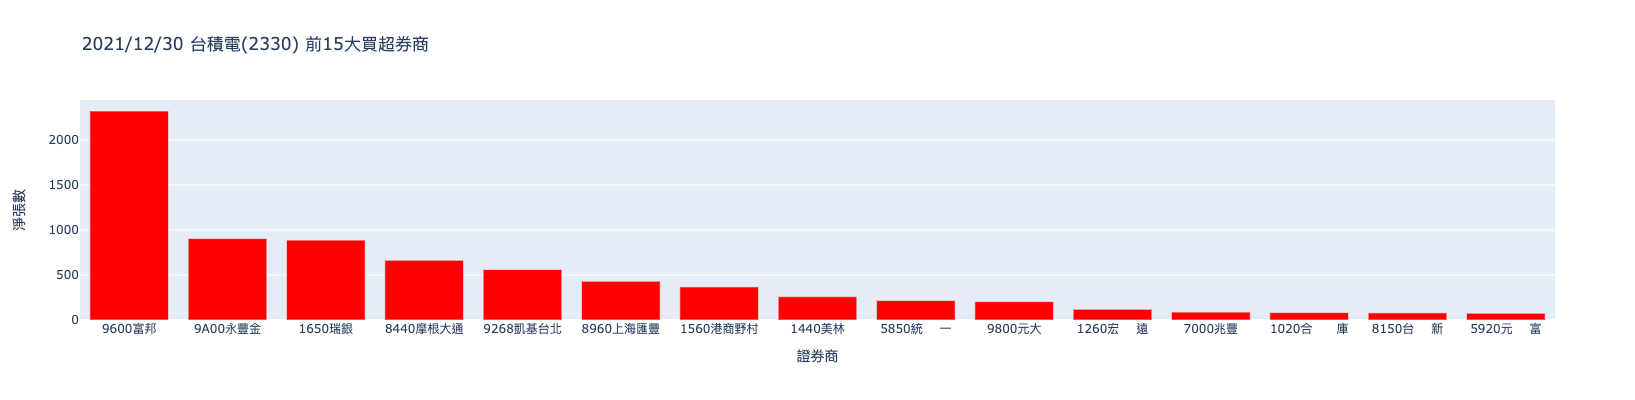

In [20]:
# 設定子圖
fig = make_subplots(rows = 1, 
                    cols = 1, 
                    shared_xaxes = True, 
                    vertical_spacing = 0.05, 
                    horizontal_spacing = 0.05)


# 圖一：買賣超淨張數
fig.add_trace(go.Bar(x = df_buy_most['證券商'], 
                     y = df_buy_most['淨張數'], 
                     showlegend = False,
                     name = '淨張數',
                     marker = dict(color = 'red')), 
              row = 1, 
              col = 1)

# 設x軸標題
fig.update_xaxes(title_text = "證券商")

# 設y軸標題
fig.update_yaxes(title_text = "淨張數")

# 設圖標及圖長寬
fig.update_layout(
    title_text = "2021/12/30 台積電(2330) 前15大買超券商",
    width = 800,
    height = 400
)